# Task 1: Exploratory Data Analysis and Feature Engineering

### 1. Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

### 2. Load dataset

In [2]:
# load the US census demographic dataset
data = pd.read_csv('data/acs2017_census_tract_data.csv')

### 3. Data exploration

In [3]:
# check first 5 rows of the dataset
data.head()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [4]:
# check last 5 rows of dataset
data.tail()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
73996,72153750501,Puerto Rico,Yauco Municipio,6011,3035,2976,99.7,0.3,0.0,0.0,...,0.5,0.0,3.6,26.9,1576,59.2,33.8,7.0,0.0,20.8
73997,72153750502,Puerto Rico,Yauco Municipio,2342,959,1383,99.1,0.9,0.0,0.0,...,0.0,0.0,1.3,25.3,666,58.4,35.4,6.2,0.0,26.3
73998,72153750503,Puerto Rico,Yauco Municipio,2218,1001,1217,99.5,0.2,0.0,0.0,...,3.4,0.0,3.4,23.5,560,57.5,34.5,8.0,0.0,23.0
73999,72153750601,Puerto Rico,Yauco Municipio,4380,1964,2416,100.0,0.0,0.0,0.0,...,0.0,0.0,0.0,24.1,1062,67.7,30.4,1.9,0.0,29.5
74000,72153750602,Puerto Rico,Yauco Municipio,3001,1343,1658,99.2,0.8,0.0,0.0,...,4.9,0.0,8.9,21.6,759,75.9,19.1,5.0,0.0,17.9


In [5]:
print("Number of records:", data.shape[0])
print("Number of features:", data.shape[1])
print("\nData types:\n", data.dtypes)

Number of records: 74001
Number of features: 37

Data types:
 TractId               int64
State                object
County               object
TotalPop              int64
Men                   int64
Women                 int64
Hispanic            float64
White               float64
Black               float64
Native              float64
Asian               float64
Pacific             float64
VotingAgeCitizen      int64
Income              float64
IncomeErr           float64
IncomePerCap        float64
IncomePerCapErr     float64
Poverty             float64
ChildPoverty        float64
Professional        float64
Service             float64
Office              float64
Construction        float64
Production          float64
Drive               float64
Carpool             float64
Transit             float64
Walk                float64
OtherTransp         float64
WorkAtHome          float64
MeanCommute         float64
Employed              int64
PrivateWork         float64
PublicWork    

In [6]:
# summary of unique values in categorical variables
categorical_columns = data.select_dtypes(include="object").columns
for column in categorical_columns:
    unique_values = data[column].nunique()
    print("Unique values in", column, ":", unique_values)

Unique values in State : 52
Unique values in County : 1955


In [7]:
# summary statistics for categorical variables
for column in categorical_columns:
    column_stats = data[column].value_counts().reset_index()
    column_stats.columns = [column, "Count"]
    print("\nSummary statistics for", column, ":\n", column_stats)


Summary statistics for State :
                    State  Count
0             California   8057
1                  Texas   5265
2               New York   4918
3                Florida   4245
4           Pennsylvania   3218
5               Illinois   3123
6                   Ohio   2952
7               Michigan   2813
8         North Carolina   2195
9             New Jersey   2010
10               Georgia   1969
11              Virginia   1907
12               Arizona   1526
13               Indiana   1511
14             Tennessee   1497
15         Massachusetts   1478
16            Washington   1458
17             Wisconsin   1409
18              Maryland   1406
19              Missouri   1393
20             Minnesota   1338
21              Colorado   1249
22               Alabama   1181
23             Louisiana   1148
24              Kentucky   1115
25        South Carolina   1103
26              Oklahoma   1046
27           Puerto Rico    945
28                Oregon    834
29     

In [8]:
numerical_columns = data.select_dtypes(include=[np.number]).columns
print("Summary statistics for numerical variables:\n\n", data.describe())

Summary statistics for numerical variables:

             TractId      TotalPop           Men         Women      Hispanic  \
count  7.400100e+04  74001.000000  74001.000000  74001.000000  73305.000000   
mean   2.839113e+10   4384.716017   2157.710707   2227.005311     17.265444   
std    1.647593e+10   2228.936729   1120.560504   1146.240218     23.073811   
min    1.001020e+09      0.000000      0.000000      0.000000      0.000000   
25%    1.303901e+10   2903.000000   1416.000000   1465.000000      2.600000   
50%    2.804700e+10   4105.000000   2007.000000   2082.000000      7.400000   
75%    4.200341e+10   5506.000000   2707.000000   2803.000000     21.100000   
max    7.215375e+10  65528.000000  32266.000000  33262.000000    100.000000   

              White        Black        Native         Asian       Pacific  \
count  73305.000000  73305.00000  73305.000000  73305.000000  73305.000000   
mean      61.309043     13.28910      0.734047      4.753691      0.147341   
std     

In [9]:
# summary of missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 TractId                0
State                  0
County                 0
TotalPop               0
Men                    0
Women                  0
Hispanic             696
White                696
Black                696
Native               696
Asian                696
Pacific              696
VotingAgeCitizen       0
Income              1116
IncomeErr           1116
IncomePerCap         745
IncomePerCapErr      745
Poverty              842
ChildPoverty        1110
Professional         811
Service              811
Office               811
Construction         811
Production           811
Drive                801
Carpool              801
Transit              801
Walk                 801
OtherTransp          801
WorkAtHome           801
MeanCommute          946
Employed               0
PrivateWork          811
PublicWork           811
SelfEmployed         811
FamilyWork           811
Unemployment         810
dtype: int64


In [10]:
# calculate the percentage of missing values for each column
missing_percent = data.isnull().mean() * 100

# sort the columns by their missing percentage in descending order
missing_percent_sorted = missing_percent.sort_values(ascending=False)

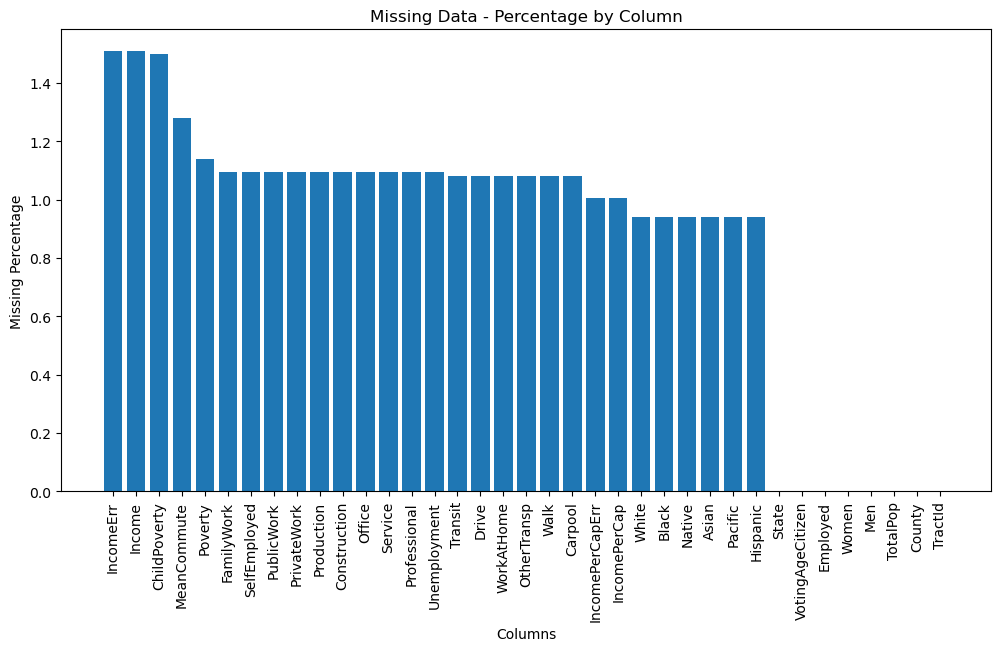

In [11]:
# visualize missing values of the data
plt.figure(figsize=(12, 6))
plt.bar(missing_percent_sorted.index, missing_percent_sorted.values)
plt.title("Missing Data - Percentage by Column")
plt.xlabel("Columns")
plt.ylabel("Missing Percentage")
plt.xticks(rotation=90)
plt.show()

In [12]:
# summary of zero values
zero_values = (data == 0).sum()
print("Zero values:\n", zero_values)

Zero values:
 TractId                 0
State                   0
County                  0
TotalPop              696
Men                   715
Women                 758
Hispanic             2241
White                 617
Black                7786
Native              43557
Asian               15571
Pacific             63894
VotingAgeCitizen      698
Income                  0
IncomeErr               0
IncomePerCap            0
IncomePerCapErr         0
Poverty               148
ChildPoverty         4972
Professional           73
Service               111
Office                 90
Construction         1011
Production            392
Drive                  49
Carpool               548
Transit             22970
Walk                14752
OtherTransp         14274
WorkAtHome           3576
MeanCommute             0
Employed              811
PrivateWork            14
PublicWork            173
SelfEmployed         1006
FamilyWork          56192
Unemployment          374
dtype: int64


### 4. Data cleaning and preprocessing

**Handling missing values**

In [13]:
# drop columns with high missing percentage
missing_threshold = 10  # Set the threshold percentage for missing values
missing_columns = missing_percent[missing_percent > missing_threshold].index
data.drop(columns=missing_columns, inplace=True)

In [14]:
# fill missing values in numerical columns with mean
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

In [15]:
# fill missing values in categorical columns with mode
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

In [16]:
# check summary of missing values
new_missing_values = data.isnull().sum()
print("Missing values:\n", new_missing_values)

Missing values:
 TractId             0
State               0
County              0
TotalPop            0
Men                 0
Women               0
Hispanic            0
White               0
Black               0
Native              0
Asian               0
Pacific             0
VotingAgeCitizen    0
Income              0
IncomeErr           0
IncomePerCap        0
IncomePerCapErr     0
Poverty             0
ChildPoverty        0
Professional        0
Service             0
Office              0
Construction        0
Production          0
Drive               0
Carpool             0
Transit             0
Walk                0
OtherTransp         0
WorkAtHome          0
MeanCommute         0
Employed            0
PrivateWork         0
PublicWork          0
SelfEmployed        0
FamilyWork          0
Unemployment        0
dtype: int64


**Handling outliers**

In [17]:
# calculate z-scores for numerical columns
z_scores = np.abs(zscore(data[numerical_columns]))

# define threshold for outlier detection
threshold = 3

# identify rows containing outliers
outlier_mask = np.any(z_scores > threshold, axis=1)

# count outliers for each column
num_outliers_by_column = np.sum(z_scores > threshold, axis=0)

In [18]:
print("Number of outliers by column:\n\n", num_outliers_by_column)

Number of outliers by column:

 TractId                0
TotalPop             793
Men                  803
Women                816
Hispanic            2257
White                  0
Black               2803
Native               550
Asian               1856
Pacific              687
VotingAgeCitizen     734
Income              1185
IncomeErr           1222
IncomePerCap        1328
IncomePerCapErr     1310
Poverty             1118
ChildPoverty         782
Professional         206
Service              677
Office               530
Construction         801
Production           598
Drive               2143
Carpool              879
Transit             2301
Walk                1496
OtherTransp         1320
WorkAtHome           947
MeanCommute          588
Employed             740
PrivateWork          779
PublicWork           926
SelfEmployed         970
FamilyWork          1414
Unemployment        1366
dtype: int64


In [19]:
# remove rows with outliers
cleaned_data = data[~outlier_mask]

In [20]:
cleaned_data.shape

(54112, 37)

In [21]:
# count the total number of outliers
num_outliers_total = np.sum(outlier_mask)

print("Number of outliers removed:", num_outliers_total)

Number of outliers removed: 19889
